In [60]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.express as px
import cv2
from PIL import Image

In [61]:
plt.style.use("seaborn")
plt.rcParams['figure.figsize'] = (13, 7)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18636\4225139297.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [62]:
data_df = pd.read_csv(r"C:\Users\ADMIN\OneDrive - Hanoi University of Science and Technology\2022-2\Hệ hỗ trợ quyết định\archive\prepared_data_book.csv")

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18636\1278318372.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(data_df.original_price, color='gray', shade=True, label='Giá ban đầu')
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18636\1278318372.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(data_df.current_price, color='g', shade=True, label='Giá hiện tại')


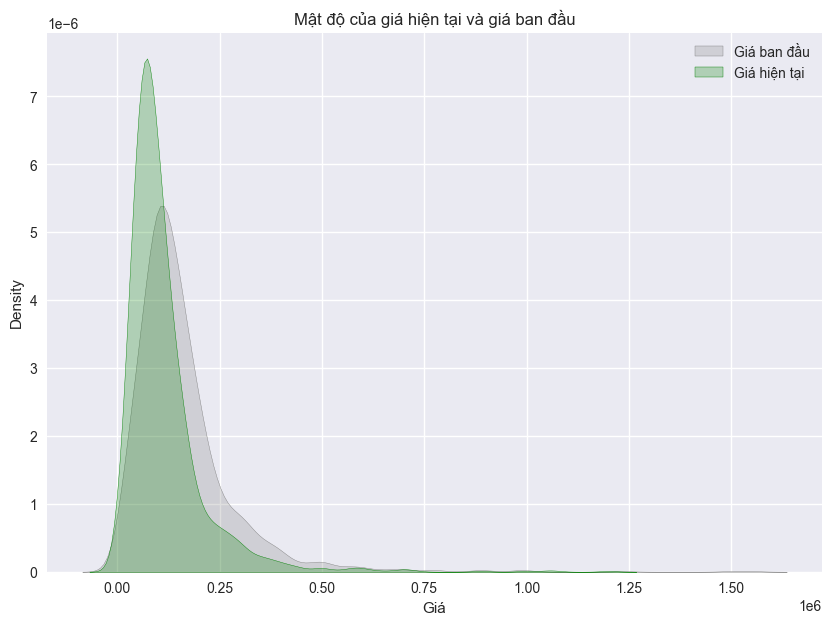

In [63]:
fig = plt.subplots(figsize=(10, 7))

ax = sns.kdeplot(data_df.original_price, color='gray', shade=True, label='Giá ban đầu')
ax = sns.kdeplot(data_df.current_price, color='g', shade=True, label='Giá hiện tại')

plt.xlabel('Giá')
plt.title('Mật độ của giá hiện tại và giá ban đầu')
plt.legend()
plt.show()

In [64]:
data_df.groupby('category').discount.mean()


category
Bài học kinh doanh               0.263962
Chăm sóc sức khỏe                0.173333
Du ký                            0.195714
Giáo Trình Đại Học - Cao Đẳng    0.016667
Kiến Thức Bách Khoa              0.319091
                                   ...   
Truyện đam mỹ                    0.267222
Tác phẩm kinh điển               0.355405
Tô màu - Luyện chữ               0.380833
Văn học thiếu nhi                0.290000
Đạo đức - Kỹ năng sống           0.253333
Name: discount, Length: 61, dtype: float64

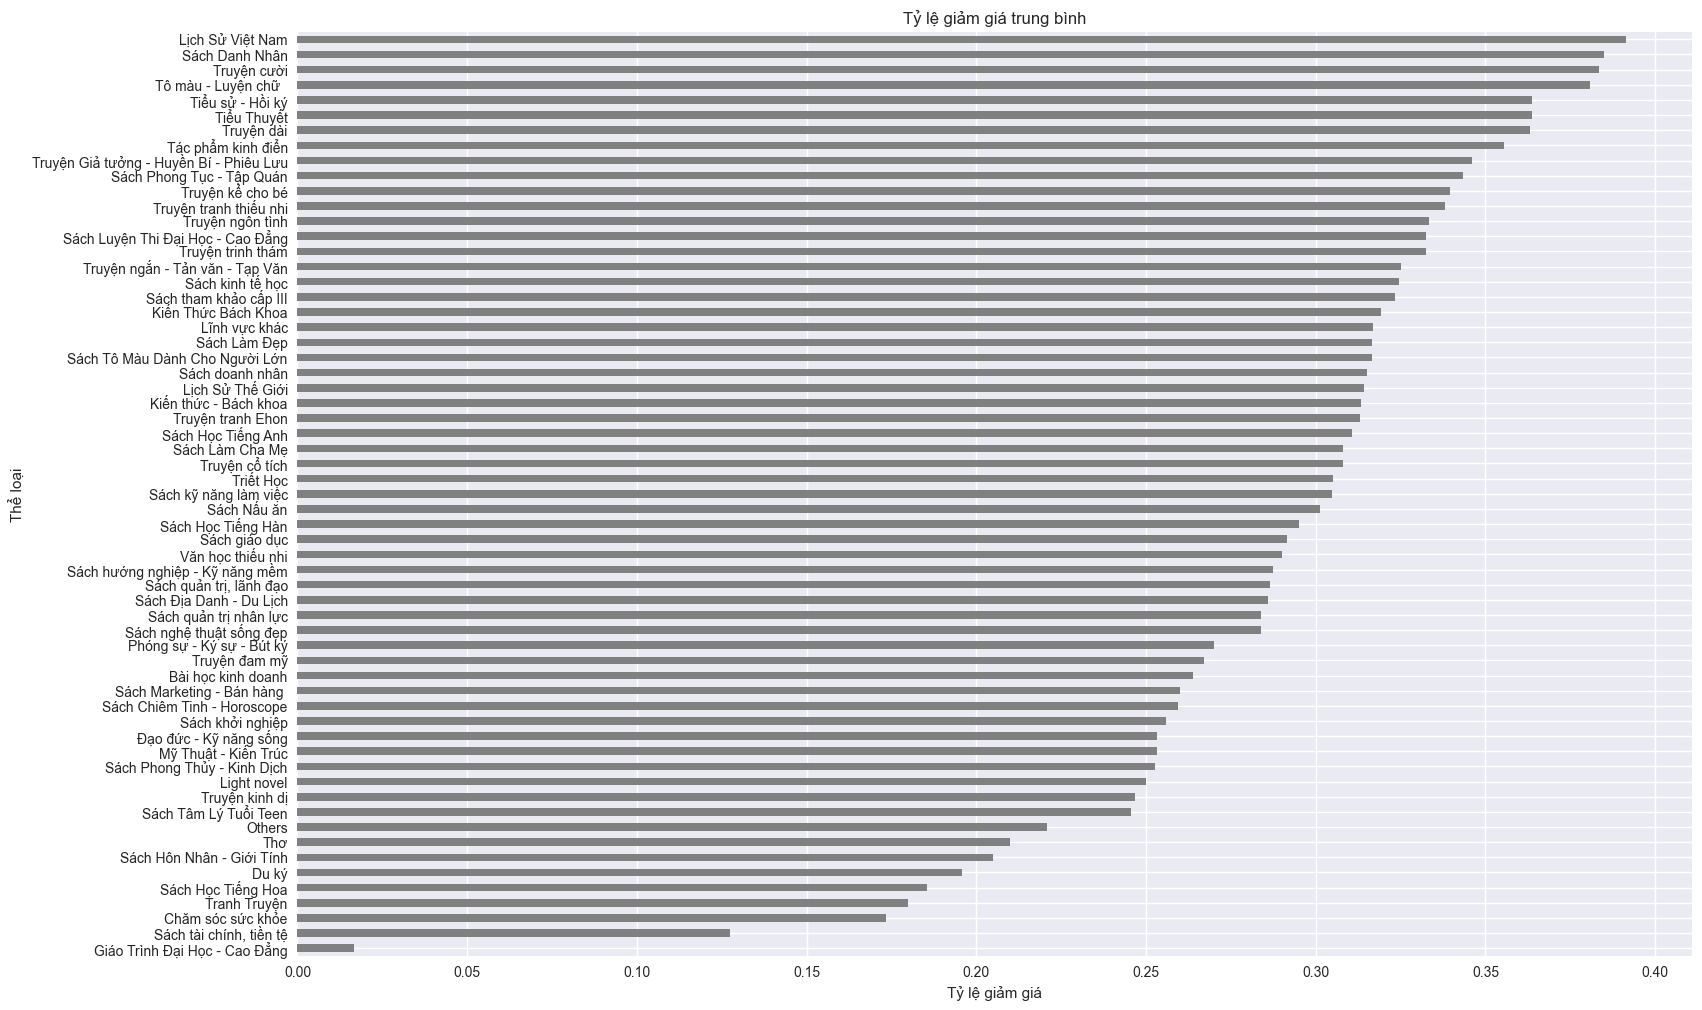

In [65]:
fig, ax = plt.subplots(figsize=(18,12))

ax=data_df.groupby('category').discount.mean().sort_values(ascending=True).plot(kind='barh', color='gray')

plt.xlabel('Tỷ lệ giảm giá')
plt.ylabel('Thể loại')
plt.title('Tỷ lệ giảm giá trung bình')
plt.show()

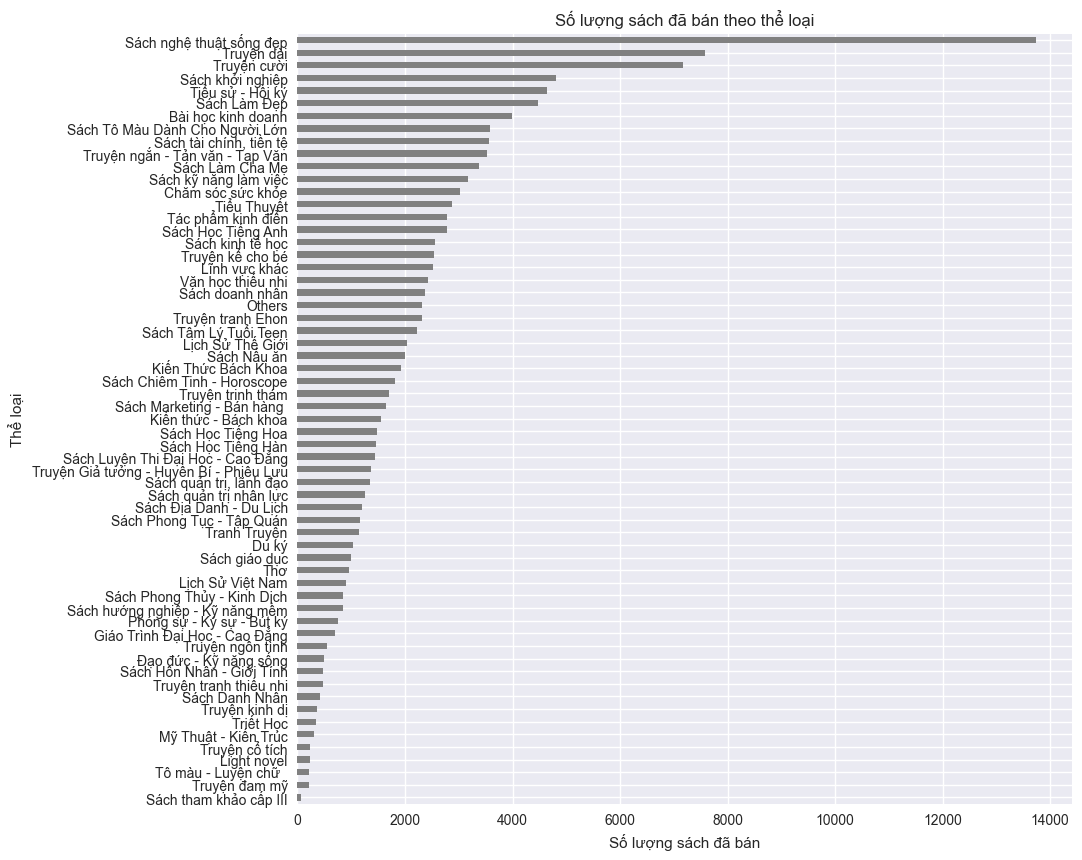

In [66]:
fig, ax = plt.subplots(figsize=(10,10))

ax=data_df.groupby('category').quantity.mean().sort_values(ascending=True).plot(kind='barh', color='gray')

plt.xlabel('Số lượng sách đã bán')
plt.ylabel('Thể loại')
plt.title('Số lượng sách đã bán theo thể loại')
plt.show()

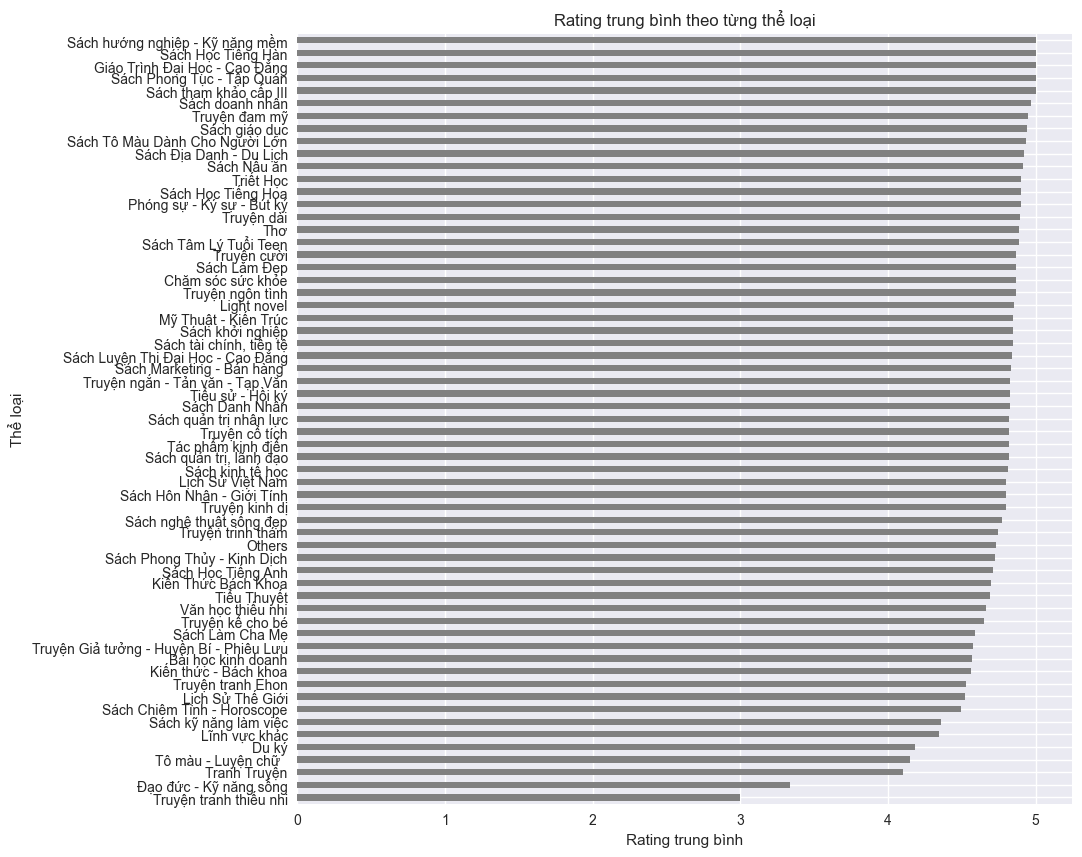

In [67]:
fig, ax = plt.subplots(figsize=(10,10))

ax=data_df.groupby('category').avg_rating.mean().sort_values(ascending=True).plot(kind='barh', color='gray')

plt.xlabel('Rating trung bình')
plt.ylabel('Thể loại')
plt.title('Rating trung bình theo từng thể loại')
plt.show()

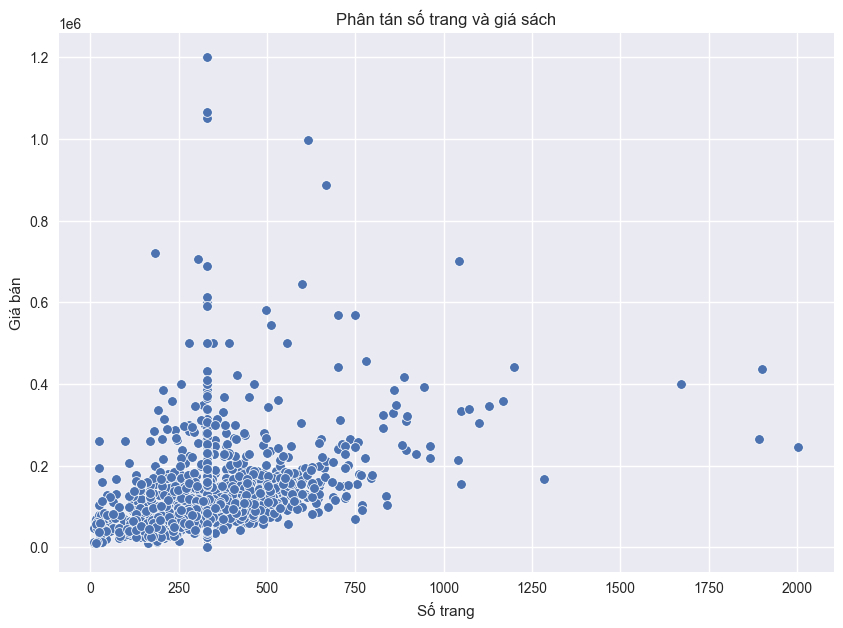

In [68]:
fig = plt.subplots(figsize=(10, 7))

ax=sns.scatterplot(data=data_df, x='pages', y='current_price')#, color="",color_continuous_scale='RdBu_r')

plt.xlabel('Số trang')
plt.ylabel('Giá bán')
plt.title('Phân tán số trang và giá sách')
plt.show()

In [69]:
def sort_authors_by_col(col):
    res = data_df.groupby('authors')[col]\
        .mean()\
        .sort_values(ascending=False)\
        .index.tolist()
    
    return res

In [70]:
quantity_lst = sort_authors_by_col("quantity")
n_reviews_lst = sort_authors_by_col("n_review")
avg_rating_lst = sort_authors_by_col("avg_rating")

In [71]:
def top_k_common_elements(list1, list2, list3, k=10):
    list1, list2, list3 = list1[:k], list2[:k], list3[:k]
    return list(set(list1) & set(list2) & set(list3))
        
result = top_k_common_elements(quantity_lst, n_reviews_lst, avg_rating_lst, 100)
result

['Jack Canfield & DD.Watkins',
 'José Mauro de Vasconcelos',
 'Thái Phạm',
 'John Boyne']

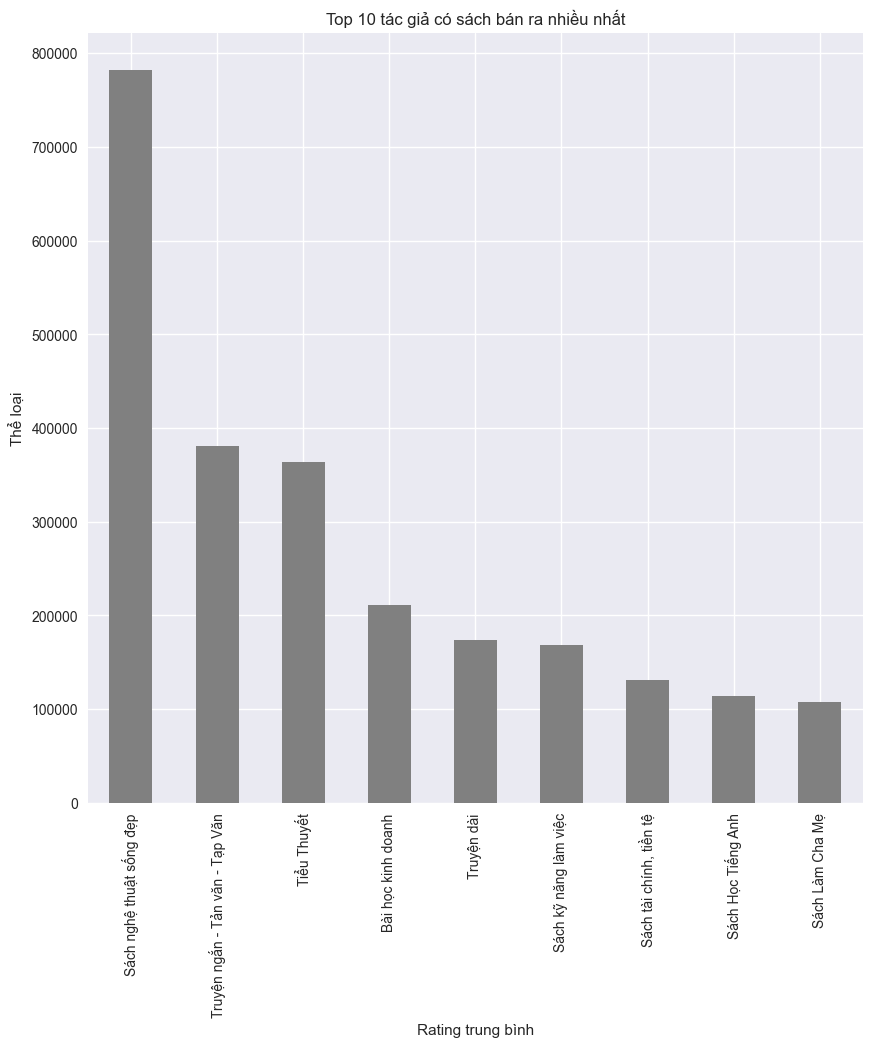

In [72]:
a = data_df.groupby('category')['quantity'].sum().sort_values(ascending=False)[:10]
a.drop(labels='Others', inplace=True)
fig, ax = plt.subplots(figsize=(10,10))
ax=a.plot(kind='bar', color='gray')
k=10
plt.xlabel('Rating trung bình')
plt.ylabel('Thể loại')
plt.title('Top {} tác giả có sách bán ra nhiều nhất'.format(k))
plt.show()

In [73]:
data_df.query("authors.str.lower().str.contains('ánh')")

,product_id,title,authors,original_price,current_price,quantity,category,n_review,avg_rating,pages,manufacturer,discount
76,35355716,Gỗ Thần,Lưu Khánh Bang,79000,67150,4,Truyện trinh thám,3,5.0,164,Unknown,0.15
147,157240665,Ra Bờ Suối Ngắm Hoa Kèn Hồng (Truyện Dài-Nguyễ...,Nguyễn Nhật Ánh,145000,85001,9116,Truyện dài,1867,5.0,336,NXB Trẻ,0.41
386,31509726,Làm Bạn Với Bầu Trời (Bìa Mềm) (Tặng Kèm Khung...,Nguyễn Nhật Ánh,110000,75001,26282,Truyện dài,2043,5.0,220,Unknown,0.32
396,186290796,Còn chút gì để nhớ (Tái Bản 2022),Nguyễn Nhật Ánh,43000,29800,249,Truyện ngắn - Tản văn - Tạp Văn,32,5.0,220,NXB Trẻ,0.31
547,53434797,Sách Tài Chính Cá Nhân Cho Người Việt Nam - Tặ...,Lâm Minh Chánh,200000,140000,12588,"Sách tài chính, tiền tệ",1702,4.7,330,Nhà Xuất Bản Phụ Nữ,0.30
579,72202103,Con Chim Xanh Biếc Bay Về (Nguyễn Nhật Ánh) (B...,Nguyễn Nhật Ánh,150000,108100,16154,Tiểu Thuyết,4284,5.0,396,NXB Trẻ,0.28
596,970417,Cây Chuối Non Đi Giày Xanh - Bìa Mềm,Nguyễn Nhật Ánh,110000,81400,23942,Truyện ngắn - Tản văn - Tạp Văn,801,4.8,304,Unknown,0.26
618,186290824,Hạ đỏ (Tái Bản 2022),Nguyễn Nhật Ánh,38000,24600,144,Truyện ngắn - Tản văn - Tạp Văn,20,5.0,184,NXB Trẻ,0.35
770,77900446,Thần Số Học: Thấu Hiểu Nhân Tâm,Tống Khánh Thượng,109000,76300,2546,Sách Chiêm Tinh - Horoscope,487,4.8,238,Nhà Xuất Bản Công Thương,0.30
803,186290802,Bàn Có Năm Chỗ Ngồi (Tái Bản 2022),Nguyễn Nhật Ánh,38000,24800,228,Truyện ngắn - Tản văn - Tạp Văn,27,4.6,188,NXB Trẻ,0.35


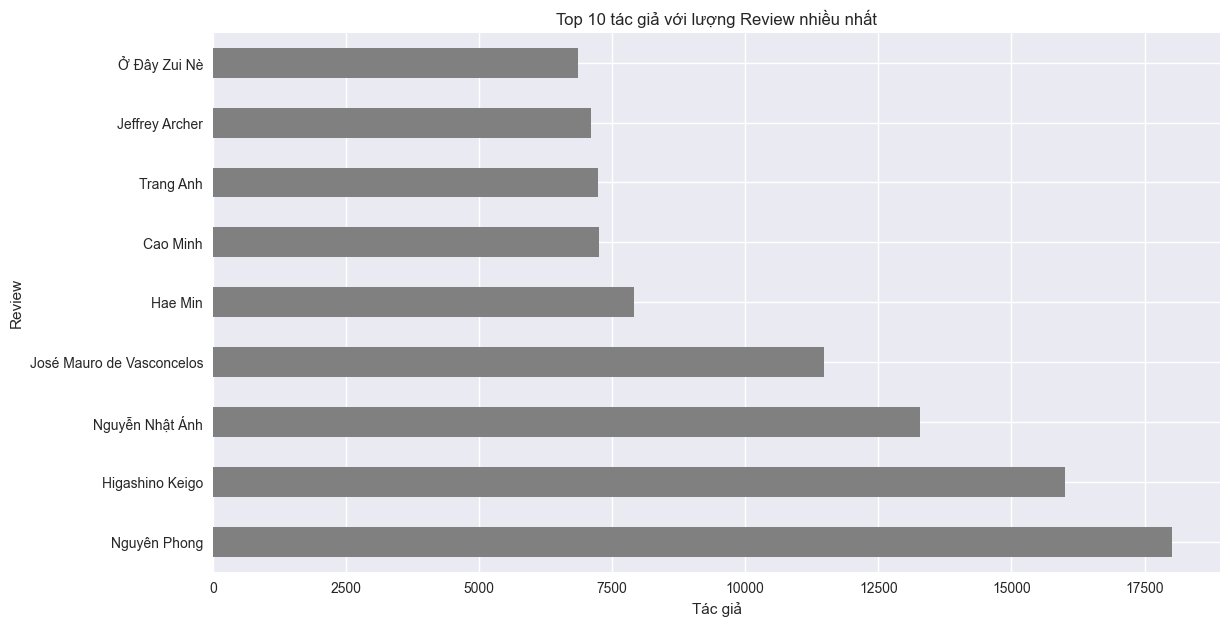

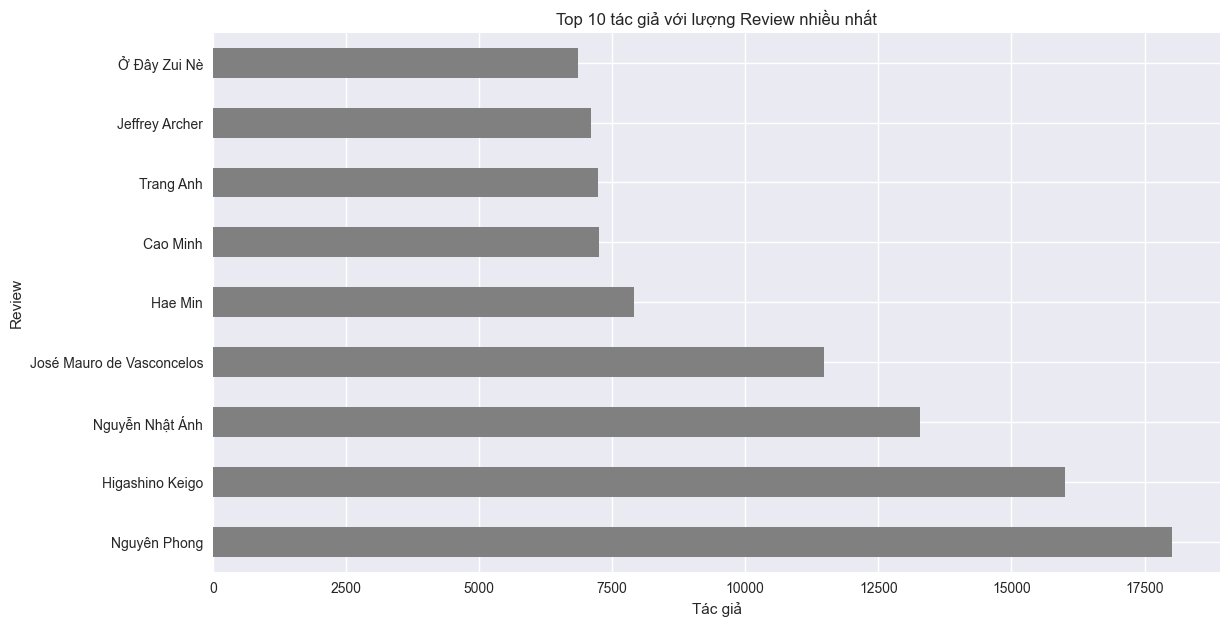

In [74]:
import ThongKe 
plot = ThongKe.Plot()
plot.Topauthors(10, 'n_review')

In [75]:
import TimKiem
Tim = TimKiem.Tim()


In [76]:
Tim.TimTheoID(184466860)

,product_id,title,authors,original_price,current_price,quantity,category,n_review,avg_rating,pages,manufacturer,discount
1,184466860,Hành Tinh Của Một Kẻ Nghĩ Nhiều,Nguyễn Đoàn Minh Thư,86000,59900,7929,Others,780,4.8,184,Nhà Xuất Bản Thế Giới,0.3


In [77]:
a = Tim.TimTheoTen('Nhà Giả Kim')
a

,product_id,title,authors,original_price,current_price,quantity,category,n_review,avg_rating,pages,manufacturer,discount
3,52789367,Nhà Giả Kim (Tái Bản 2020),Paulo Coelho,79000,47400,24668,Tác phẩm kinh điển,5131,5.0,228,Nhà Xuất Bản Hà Nội,0.4


In [78]:
import pandas as pd

In [79]:
df = { 'product_id': [],
               'title': [], 
               'author': [],
               'original_price': [], 
               'current_price': [], 
               'quantity': [],
               'category': [], 
               'n_review': [], 
               'avg_rating': [],
               'pages': [], 
               'manufacturer': [], 
               'discount': []}
df = pd.DataFrame(df)

In [80]:
df.append(a)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18636\688406051.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df.append(a)


,product_id,title,author,original_price,current_price,quantity,category,n_review,avg_rating,pages,manufacturer,discount,authors
3,52789367.0,Nhà Giả Kim (Tái Bản 2020),NaN,79000.0,47400.0,24668.0,Tác phẩm kinh điển,5131.0,5.0,228.0,Nhà Xuất Bản Hà Nội,0.4,Paulo Coelho


In [81]:
import pandas as pd
df1 = {'Name': []}
df1 = pd.DataFrame(df1)
df1.to_csv('ThuVien.csv', index=False, index_label=False)


In [82]:
new = {'Name': 'Bum'}
df1.append(new, ignore_index=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18636\1491366776.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1.append(new, ignore_index=True)


,Name
0,Bum


In [83]:
def sort_authors_by_col(col):
    res = data_df.groupby('authors')[col]\
        .mean()\
        .sort_values(ascending=False)\
        .index.tolist()
    
    return res

In [84]:
data = data_df.copy()
sorted_df = data.sort_values(by='quantity', ascending=False)


In [85]:
mean_values = sorted_df.head(100).mean()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18636\4192769722.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_values = sorted_df.head(100).mean()


In [86]:
a = data_df.mean()
data_df.groupby('category').discount.mean()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18636\2829392979.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  a = data_df.mean()


category
Bài học kinh doanh               0.263962
Chăm sóc sức khỏe                0.173333
Du ký                            0.195714
Giáo Trình Đại Học - Cao Đẳng    0.016667
Kiến Thức Bách Khoa              0.319091
                                   ...   
Truyện đam mỹ                    0.267222
Tác phẩm kinh điển               0.355405
Tô màu - Luyện chữ               0.380833
Văn học thiếu nhi                0.290000
Đạo đức - Kỹ năng sống           0.253333
Name: discount, Length: 61, dtype: float64

In [87]:
#authorsInTop = sorted_df[:100].sort_values(by='authors', ascending=False)
a = (sorted_df.head(100)).groupby('authors').sum()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18636\1228360037.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  a = (sorted_df.head(100)).groupby('authors').sum()


In [88]:
a.sort_values(by='quantity', ascending=False)

,product_id,original_price,current_price,quantity,n_review,avg_rating,pages,discount
authors,,,,,,,,
Osho,75307228,168000,110800,671121,1855,5.0,350,0.34
Nguyễn Nhật Ánh,118859316,560000,401401,117376,9732,24.4,1514,1.42
Nguyên Phong,218142280,534000,359600,80725,13125,14.6,1430,0.95
Hae Min,7593952,224000,134400,78185,7133,9.6,556,0.80
Tống Mặc,26114399,89000,57001,65623,6602,4.8,264,0.36
...,...,...,...,...,...,...,...,...
Rolf Dobelli,7718737,118000,70800,9719,888,4.8,422,0.40
Thomas L. Friedman,7982626,310000,218300,9627,736,4.7,330,0.30
J. K. Rowling,1080002,1550000,1200000,9562,1438,4.7,330,0.23


In [89]:
import numpy as np

arr = np.array([1.234, 2.567, 3.789])

rounded_arr = np.round(arr, 0)
print(rounded_arr)  # Output: [1.2 2.6 3.8]


[1. 3. 4.]


In [90]:
3.3 // 1

3.0

In [91]:
mean_values.pages

342.87

In [92]:
pages = data_df.pages.values
quantity = data_df.quantity.values

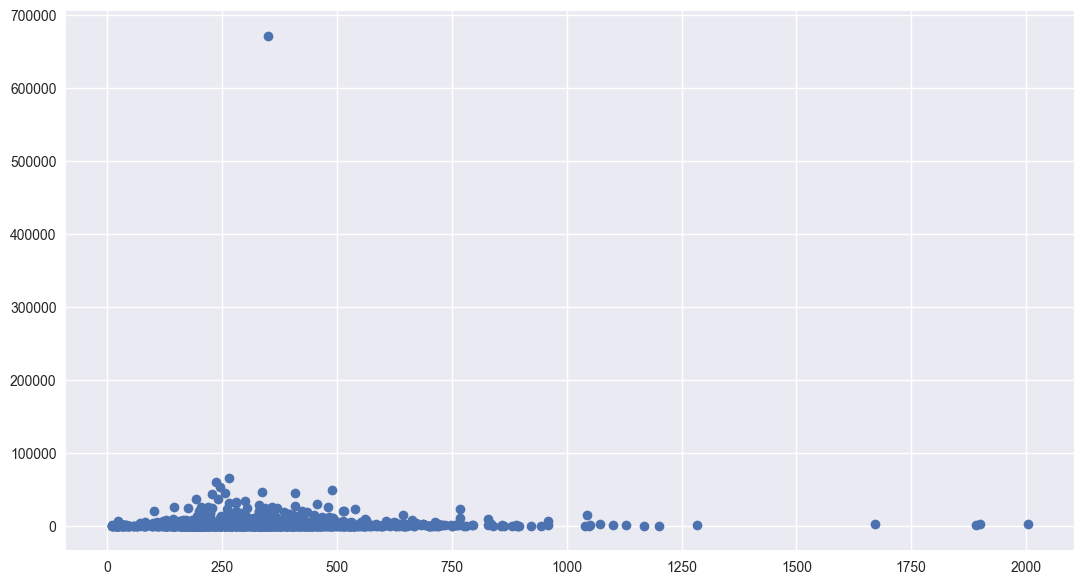

In [93]:
import matplotlib.pyplot as plt
plt.plot(pages, quantity, 'o')
plt.show()

In [94]:
data_df.quantity.idxmax()

120

In [95]:
data.drop(120, inplace=True)
data.quantity.max()

65623

In [96]:
pages = data.pages.values
quantity = data.quantity.values

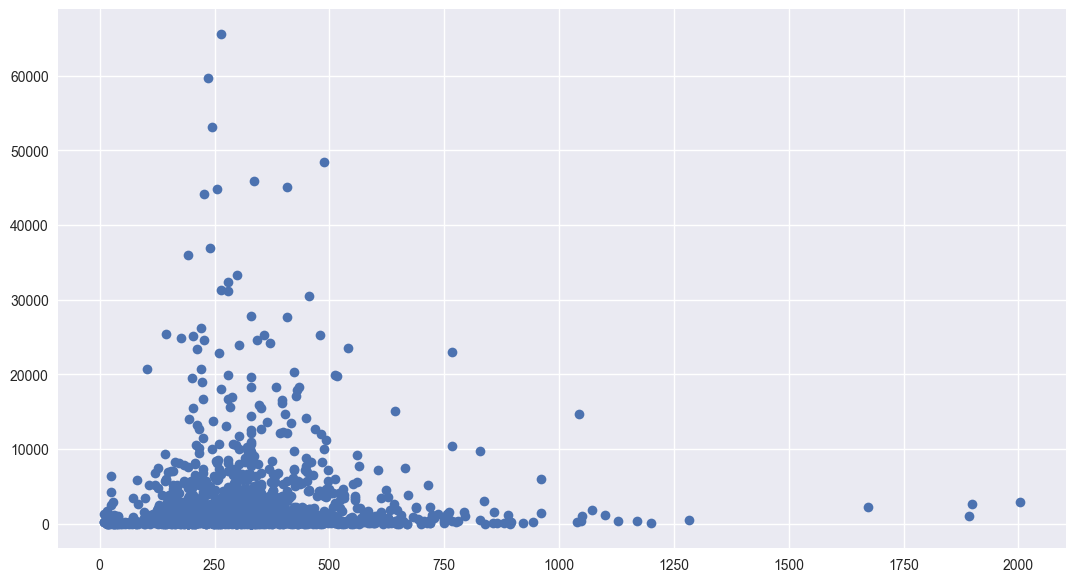

In [97]:
import matplotlib.pyplot as plt
plt.plot(pages, quantity, 'o')
plt.show()

In [98]:
Ds = pd.read_csv('ThuVien.csv')


In [99]:
def createListbook(Ds,keyword): 
    newrecord = {'Name': keyword }
    Ds = Ds.append(newrecord, ignore_index=True)
    Ds.to_csv('ThuVien.csv')
    newlist = { 'product_id': [],
               'title': [], 
               'author': [],
               'original_price': [], 
               'current_price': [], 
               'quantity': [],
               'category': [], 
               'n_review': [], 
               'avg_rating': [],
               'pages': [], 
               'manufacturer': [], 
               'discount': []}
    newlist = pd.DataFrame(newlist)
    newlist.to_csv('{}.csv'.format(keyword))


In [100]:
createListbook(Ds, "bum")

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18636\2452714926.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Ds = Ds.append(newrecord, ignore_index=True)


In [1]:
import DanhSach

In [2]:
DS = DanhSach.DanhSach()
DS.createListbook('Yêu Thích')

c:\Users\ADMIN\OneDrive - Hanoi University of Science and Technology\2022-2\Hệ hỗ trợ quyết định\archive\DanhSach.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.Ds = self.Ds.append(newrecord, ignore_index=True)
